# General instructions: 

To import the files needed, at the beginning of each exercise thers is a box where I stored the variables which contains the path for each file, just change them with yours.

Each exercise has the following structure: Introduction, where you can read the theory behind, our purpose and how we worked (with also the description of the function we used, find it the libreries). Code, as you can imagine the code, or better , the "main" of each exercise.

# Exercise 1: hashing

## Introduction:

The purpose of this exercise is to develop a Bloom filter with a fileof password (passwords1.txt) and then check if the passwords in another file (passwords2.txt) are in the first one or not. As we have studied, the Bloom filter is an optimal way to store a large number of elements, because it is far away faster than check directly whether the element is present or not in a list. Unfortunately, this method is not 100% working, namely what it really says is if that element is probabily there or there isn't. To understand why this happens it is important to fast understand how to Bloom filter is created: as first step each element is transformed in a number by an hash function (or more), this number represents the index of a bit array, if in that position there is a zero, it is changed in a one, else nothing happens. To check if the element is in the bit array, as first step the element must be transformed by the hash function used to create the filter, if the position represented by the number in the bit array contains a 0 it means that the element is not in else it probabily exist.

This method cannot ensure that an element exist for sure, because of the hash function: under the right conditions, it should create an unique result, but it dosen't always happen, sometimes to different elements can have the same hash, therefore even if the position results occupied (1), it may happen that the element inside is not the searched one (so 100% there isn't, but not sure whether it is inside). To overcome this issue there are two possible approches: to use and combine more than one hash function and to build a bit array with a larger size (at least 3 times) than the elements.

In our case, we have fixed p = 0.01, it means that the probability to find a false positive is 1%, this decision has been driven by our computationl constraints (however with multithreaded programming we could have reduced more this probability). Given the probability there are two formulas to compute the size of the bit array (that you can easily found on internet). We have choosen a prime number for the size, because it is also the figure that we use to divide our hash function to get the index of the bit array. The reason behind this is that if in our sample of hashfunctions there are many values divisible by a same number, it can happens that many indexes are the same, with a prime number this problem is avoided. 

## Code:

In [ ]:
# Import libraries an set the paths:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

import hashing_lib as bf

In [3]:
DB1 = "/Users/Dario/Desktop/DATA/passwords1.txt"
DB2 = "/Users/Dario/Desktop/DATA/passwords2.txt"

In [4]:
# Open the files:

In [5]:
passwords_1 = open(DB1).read()
lst_pw = passwords_1.split("\n") # Create a list with all passwords

passwords_2 = open(DB2).read()
to_check = passwords_2.split("\n")

In [6]:
# Let's calculate the dimension of the bit array and the number of hash functions:

In [7]:
p = 0.01 # we choose 1% of false positive
n = len(lst_pw) # the length of the list containing all passwords 

m, k = bf.choose_size_and_hash(p, n) # Tell us the right dimensions of bit array and number of hashes

Number of hash functions we need: 7 
Bit Array size:  958505851 
Is the probability of False Positive is minimized? True


In [8]:
bloom = bytearray(m) # The filter whith all zeros (at the beginning) and size m

In [9]:
# Let's test the uniformity of the hash functions:

For the hash function we choose the one suggested by the book: the sum of the product between the ascii number of the caracter and a random number (a different random number for each function). We have tried with other functions, but the easier one is also the faster, the less calculuss it has to do, the faster it works. 

If the passwords are uniform distributed, their histogram should look like a rectangle.

In [10]:
# Random numbers to use to calcualte the hash functions
coeff = list(map(int, np.random.randint(low = 0, high = m, size = 141))) 

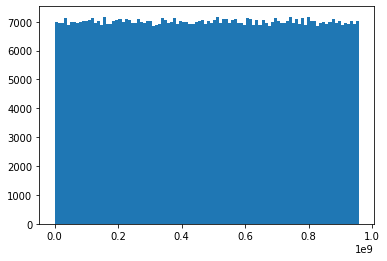

In [11]:
indexes = []
for pw in lst_pw[0:100000]:
    indexes.append(bf.hash1(pw, coeff, m))
    indexes.append(bf.hash2(pw, coeff, m))
    indexes.append(bf.hash3(pw, coeff, m))
    indexes.append(bf.hash4(pw, coeff, m))
    indexes.append(bf.hash5(pw, coeff, m))
    indexes.append(bf.hash6(pw, coeff, m))
    indexes.append(bf.hash7(pw, coeff, m))


plt.hist(indexes, bins = 100)
plt.show()

In [12]:
# Let's create the filter and check the passwords:

The "CreateFilter" function just switches for each passwords the corresponding positions in the bloom filter, given by the hash functions (the indexes). The other lines of this function are only used to be avare at which point of the process we are.

The "CheckPass" function firstly transform the password with the same hash functions used in the CreateFilter function and then check if all the position in the filter, given by the indexes generated by the hash functions, are equal to 1. Only in this case it adds the password to the match list.

In [13]:
beginning = time.time() # When we start the process

bf.CreateFilter(lst_pw, bloom, coeff, m) # Create the filter
match = bf.CheckPass(to_check, bloom, coeff, m) # Check the passwords and return the ones contained in both files

finish = time.time() # end of process


Start to create the Bloom Filter at 17:33:22

Local Time: 17:38:45
Tot. time: 5.39 minutes
Time needed for this millions: 5.39 minutes
N. elements: 10000000
Percentage: 10.0%

Local Time: 17:44:0
Tot. time: 10.63 minutes
Time needed for this millions: 5.24 minutes
N. elements: 20000000
Percentage: 20.0%

Local Time: 17:49:12
Tot. time: 15.84 minutes
Time needed for this millions: 5.21 minutes
N. elements: 30000000
Percentage: 30.0%

Local Time: 17:54:25
Tot. time: 21.05 minutes
Time needed for this millions: 5.21 minutes
N. elements: 40000000
Percentage: 40.0%

Local Time: 17:59:40
Tot. time: 26.31 minutes
Time needed for this millions: 5.26 minutes
N. elements: 50000000
Percentage: 50.0%

Local Time: 18:4:58
Tot. time: 31.6 minutes
Time needed for this millions: 5.29 minutes
N. elements: 60000000
Percentage: 60.0%

Local Time: 18:10:18
Tot. time: 36.94 minutes
Time needed for this millions: 5.34 minutes
N. elements: 70000000
Percentage: 70.0%

Local Time: 18:15:33
Tot. time: 42.2 min

In [15]:
print('Number of hash function used:', k)
print('Number of duplicates detected: ', len(match))
print('Execution time: ', round((finish - beginning)/60,2), "min")
print("There should be at most:", int(p*len(to_check)), "False positive")

Number of hash function used: 7
Number of duplicates detected:  14251162
Execution time:  73.14 min
There should be at most: 390000 False positive


# Exercise 2: Counting Sort

## Introduction

As seen also in class, the algorithms for sorting more efficient elements are limited by O(nlogn), in this exercise we implemented the counting sort that under the strong assumption that the elements to be ordered are integers, its complexity is limited by O(n + k) where n is the number of elements in the list and k is the largest integer in the list.
From this we can deduce that if the list is very long and the elements are small or at least limited by O(n) then the algorithm is limited by O(n).
While if k is greater than n the complexity grows together with k.
For example it would take O(n^2) time if the given k is of size n^2.


## Code:

In [16]:
import sorting_lib as sl

In [17]:
sl.counting_sort([1,5,8,6,3])

[1, 3, 5, 6, 8]

To be able to apply the sorting counting of the letters we must associate to each of them an integer in such a way as to shift the ordering over the associated integers.
This procedure does not add complexity to the algorithm so theoretically the algorithm is limited by O(n + k).
But even in this case the complexity varies from the input list.
If the list is short and in it there are 'z' (having assigned growing integers)
then the complexity will be given by k the whole associated with z,if instead the list is very long and there are only the first letters of the alphabet then the complexity is given O(n)

In [18]:
sl.counting_sort_letters(['a','x','A','c'])

['A', 'a', 'c', 'x']

To sort the words I use the algorithm used to sort the letters without adding complexity.
But this process is called for m the length of the string,therefore the complexity is usually m(n + k).
Empirically, as already mentioned, it changes according to the structure of the list and the letters to be ordered.

In [19]:
sl.counting_sort_words(['h ouse','hoc','home-c','bath'],-1)

['bath', 'h ouse', 'hoc', 'home-c']

# Exercise 3: KMeans

In this part we are going to implement the kmean function by hand. The idea behind the KMeans is that each point is associated with the closer centroid. The problem of this process is that the strating position of the centroids is random, so to get the optimal solution it is necessary to iterate few times till the best centroids will have been founded. In each cycle, all the points are associated to the closer centroid and at the end of the process the mean for each coordinate is calculated for each group of points. The new clusters have as coordinates the means of the corresponding group. The process finishes when the previous centers are equal to the new ones. This is litteraly what we coded in the function "Kmeans". There is also a function, called "gen_random_centroids", it generates the centroids at the beginning with random coordinates, anyway we believe that this points should be in a range between the max and min value (for each coordinate), so we implemented the function to do this.

In order to obtaim a reasonable result we have normalized the data before starting. We did this because till KMeans measures the distances between points and centers, having different features with a large difference in magnitude (ex. Flavoid has a range between 0.34 and 5.08 and Proline between 278 and 1680) will bring to a wrong clusterization. Therefore we have implemented a function to normalize data. Furthermore, it would be a good norm also to Scale data, in order to get rid of data that creates only mess in our analysis (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages). Howevere, our dataset is not so large, so we just skip this passage and we reduced in two dimensions (it is not the best solution) only at the end to plot the result.

Finally, it dosen't exist a unique method to get the right number of clusters to use in the model. We used a heuristic method to do it: we choose the number of cluste for which the cost function (in this case it represents the sum of all distances between points and centers is minimized) is minimized. We did this with the function called "cost". This solution is also called elbow mwthod, because graphically the point to choose is the one in which the cost function stops dropping fast and starts to decrease slower.

## Code:

In [1]:
# Import libraries and set the path:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from collections import defaultdict
import seaborn as sns
from sklearn.cluster import KMeans

# The library we have created:

import clustering_lib as km

In [22]:
PATH = "/Users/Dario/Google Drive/DS/AMD/Homeworks/HMW4/wine.data"

In [4]:
# Open the database and clean it:

In [23]:
wines = pd.read_csv(PATH) # load the files to use

col_name = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash ','Magnesium','Total phenols',
            'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
            'OD280/OD315 of diluted wines','Proline']
wines.columns = col_name
wines.drop(columns = ['class'],inplace = True)

In [24]:
wines.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
# Let's analyze the DF:

In [25]:
wines.shape # Number of rows and cols

(177, 13)

In [26]:
wines.isna().any() # Check for NA

Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

In [27]:
# Verify that each columns has the right data type:
for name in col_name[1:]:
    print(wines[name].dtype, end=", ")

float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, float64, float64, int64, 

In [11]:
# Normalize the db:

In [28]:
db_normalize = km.Normalize(wines) # Normalize data

In [13]:
# Calculate the correct number of clusters:

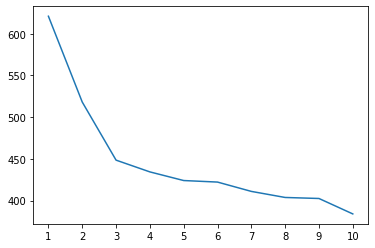

In [32]:
list_all_distances  = km.cost(10, db_normalize)
plt.plot(range(1,11), list_all_distances)
plt.xticks([i for i in range(1, 11)])
plt.show()

In [15]:
# Just a remark before going on:

We are using PCA only to reduce data in two dimensions, we must underline that as you can note from the graph below: two components represent almost the 60% of the variance of the system, to have a value between 80% and 90% we should take between 4 and 6 components.

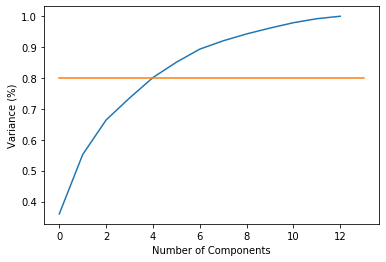

In [33]:
pca = PCA().fit(db_normalize)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,13], [0.80,0.80])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [17]:
# Representation in 2 dimension with the right number of cluster:

We can say that our kmeans works pretty well, in almost all cases it divides our data as the one of the library sklearn. The only difference is made by the coordinates of the centroids that are usually a little bit different than the ones of the libraries, but anyway there is a minimum discrepancy.

#### A consideration: 

We will see later that a problem of KMeans is that it assumes that the cluster are spherical, in this case, when we reduce with PCA in two dimensions,our eyes suggest us that the optimal clusters are not spherical. So, maybe if we used anothe algorithm that cosiders this aspect, it would tourn out that the number of clusters is 2.

In [67]:
centroids = km.gen_random_centroids(db_normalize, 3) # Generate the centroids randomly

result_Kmeans = km.Kmeans(3, db_normalize, centroids)

#I select the points associated with each cluster

N_cluster = result_Kmeans[0].keys() # They are number of clusters

lst = []
for x in N_cluster:
    points = result_Kmeans[0][x] # From the dictionary get all points related with cluster x
    dict_points = defaultdict(list)
    for point in points:
        lst_point = list(point) # create a list with each point

        lst_point.append(x-1) # and the corresponding centroid
        dict_points[x].append(lst_point) # add the list to the corresponding key of the dictionary

        points = dict_points[x] 

    df_single_cluster = pd.DataFrame(points) # create a df with point and centroid
    lst.append(df_single_cluster) # Add this df to a list
        
df_final = pd.concat(lst) # Concatenate the element of the list
df_final
df_final  = df_final.reset_index(drop = True) # delet the index
d1 = df_final[13] 
df_final.drop(columns = [13],inplace = True) # Delet this columns
    
z = km.Scale(df_final)
x = [z,d1]
dw = pd.concat(x,axis = 1)
dw = dw.rename(columns = {0:"PCA1",1:"PCA2",13:"n_clust"})

# Get the centroids in two dimensions coordinates:

centers = km.Scale(result_Kmeans[1]).to_numpy() # a list with the final centroids

centr_coord_x = []
centr_coord_y= []
for i in centers:
    for j in range(len(centers)):
        x = centers[j][0]
        y = centers[j][1]
        centr_coord_x.append(x)
        centr_coord_y.append(y)

# Implement the KMeans with the library:

clust = KMeans(n_clusters = 3, random_state = 5) # Implemet the cluster with the final centroids
clust.fit(dw)

c_x = []
c_y = []
for arr in clust.cluster_centers_: # Get the cooridnates of the centroids
    c_x.append(arr[0])
    c_y.append(arr[1])

In [ ]:
# Let's plot the clusters:

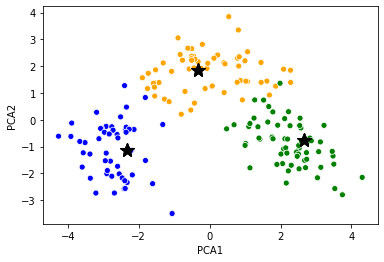

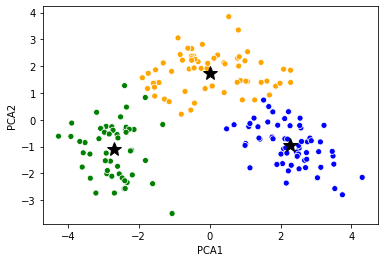

In [68]:
# Our Clustering:

plt.figure(1)
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'n_clust', data = dw,
                legend = False, palette = ["blue", "orange", "green"])
plt.plot(centr_coord_x, centr_coord_y, "*k", markersize=15)
plt.show()

# Plot the KMewans made by the lib:

plt.figure(2)
sns.scatterplot(dw.iloc[:, 0], dw.iloc[:, 1], hue = clust.labels_,
                legend = False, palette = ["orange", "blue", "green"])
plt.plot(c_x, c_y, "*", c = "k", markersize=15)
plt.show()

In [19]:
# An example with all dimensions:

In this case we don't reduce the dimension of the dataset and we plot the cluster only on two columns od the DF, also in this case works very well. However, we must tell that it isn't so good for any pair got from the dataset.

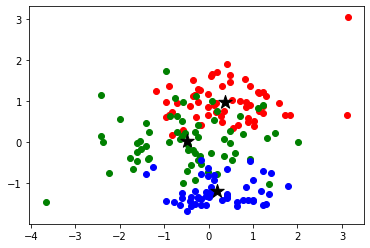

In [37]:
colors = ['r', 'g', 'b','y','c','m']
fig, ax = plt.subplots()
d1 = km.Kmeans(3, db_normalize, centroids)
d2 = d1[0]
centroids = d1[1]
# plotting of points
for i in range(1,len(d2)+1):
    points = d2[i]
    lst_x = []
    lst_y = []
    for j in range(len(points)):
        lst_x.append(points[j][2])
        lst_y.append(points[j][6])
    ax.scatter(lst_x, lst_y, c=colors[i-1])
    
# plotting of centroids
    lst_x_cntr = []
    lst_y_cntr = []
    centr = centroids[i-1]
    lst_x_cntr.append(centr[2])
    lst_y_cntr.append(centr[6])
    ax.scatter(lst_x_cntr,lst_y_cntr, marker = '*', s = 200, c = 'black')
plt.show()

In [ ]:
# An analysis of the distribution of the variables for each cluster:

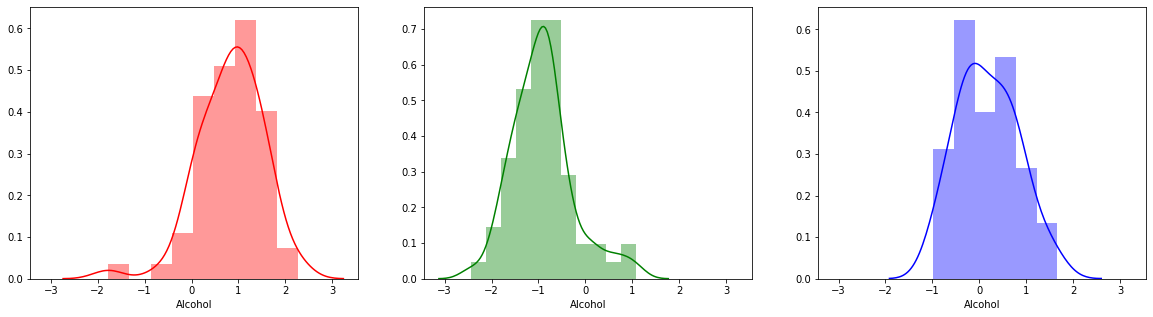

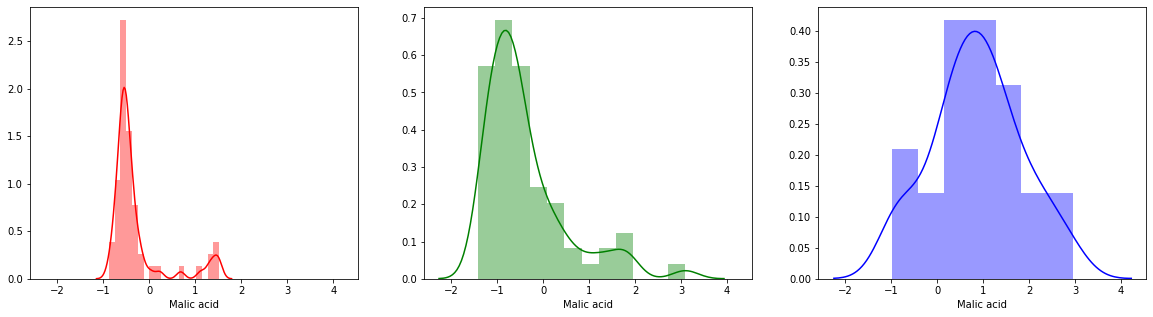

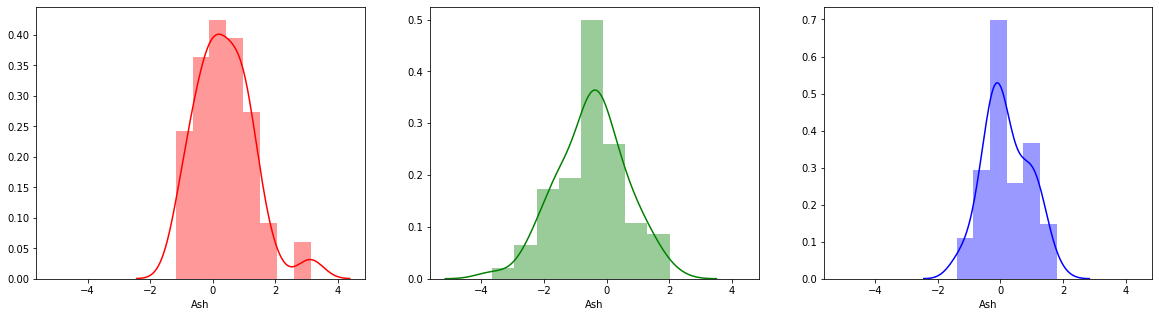

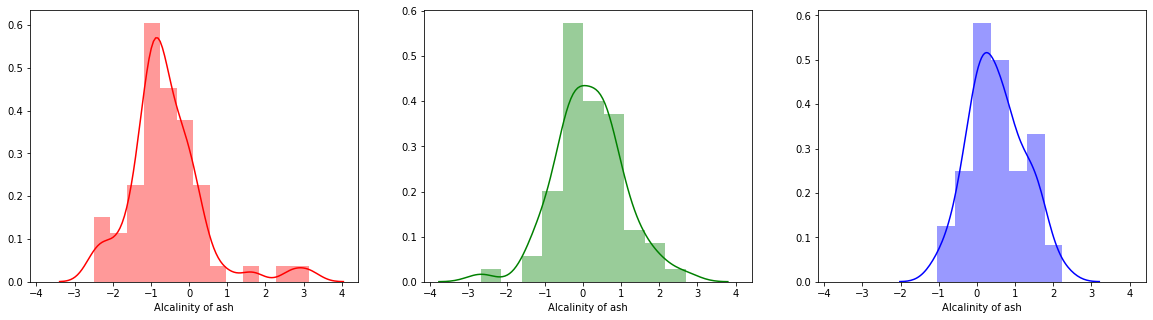

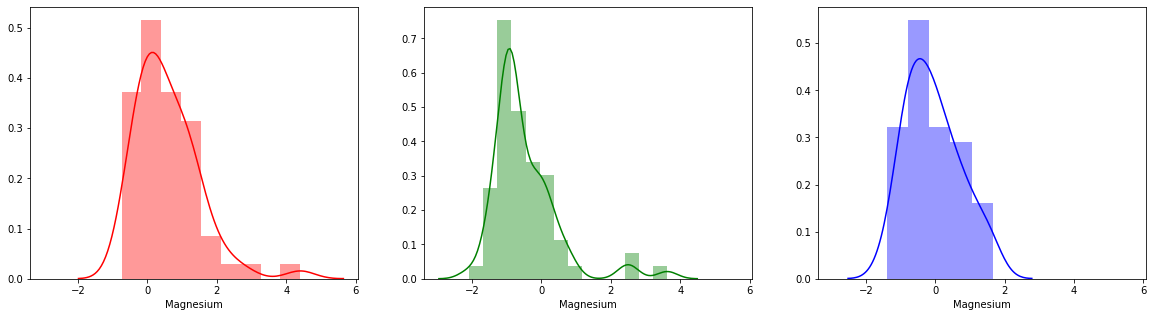

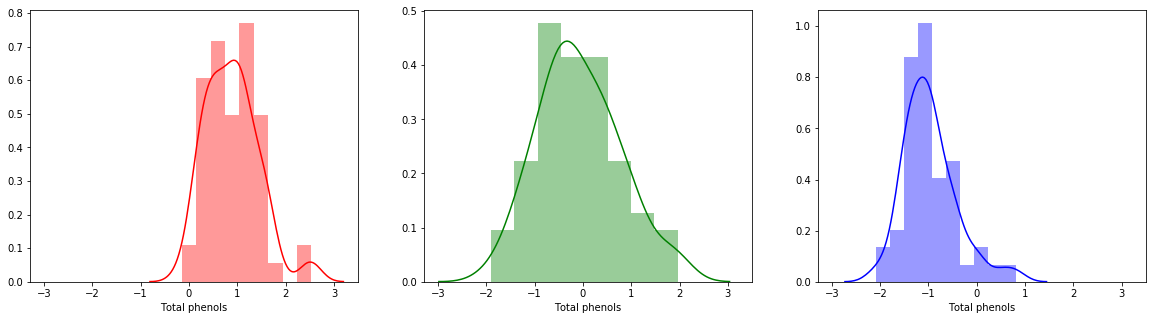

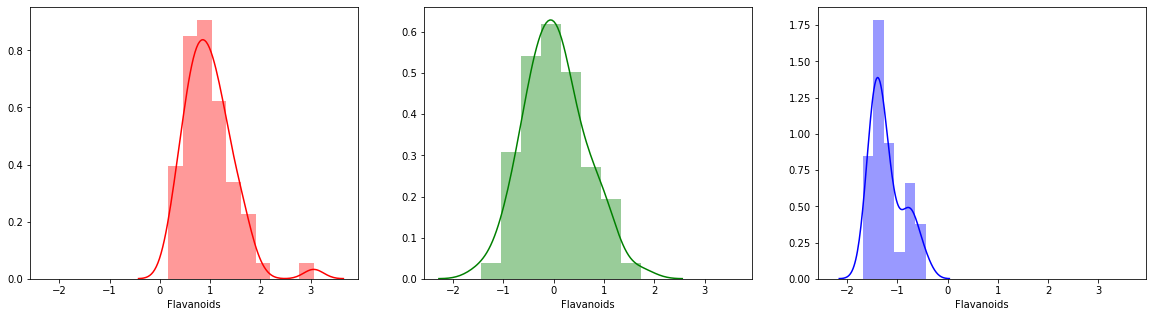

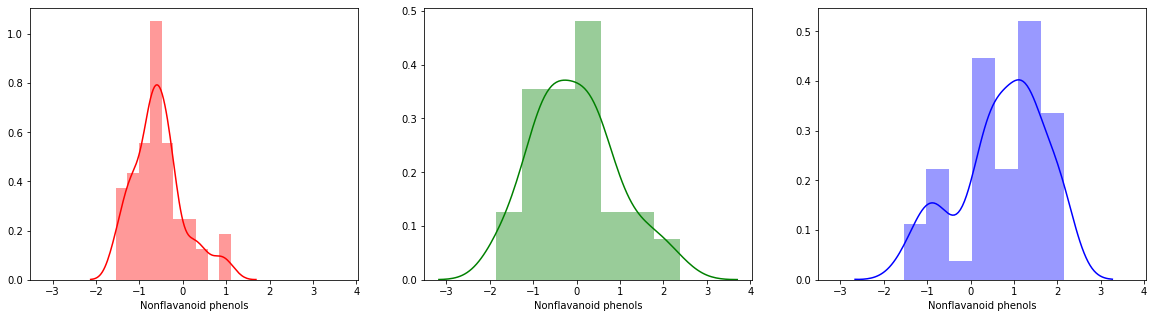

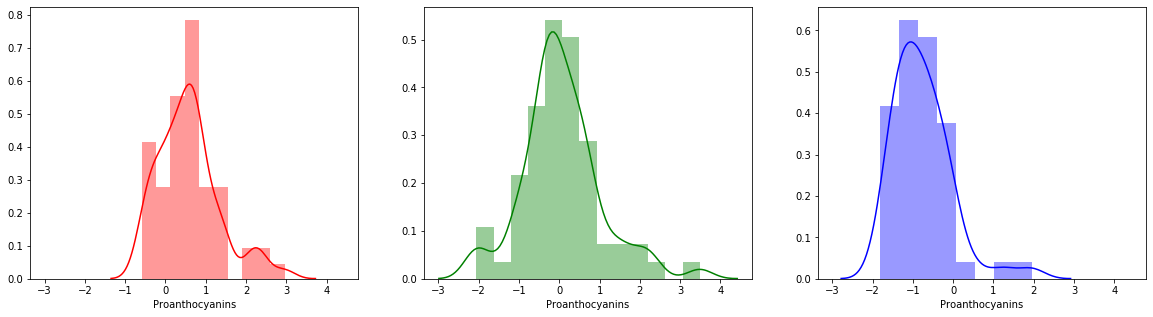

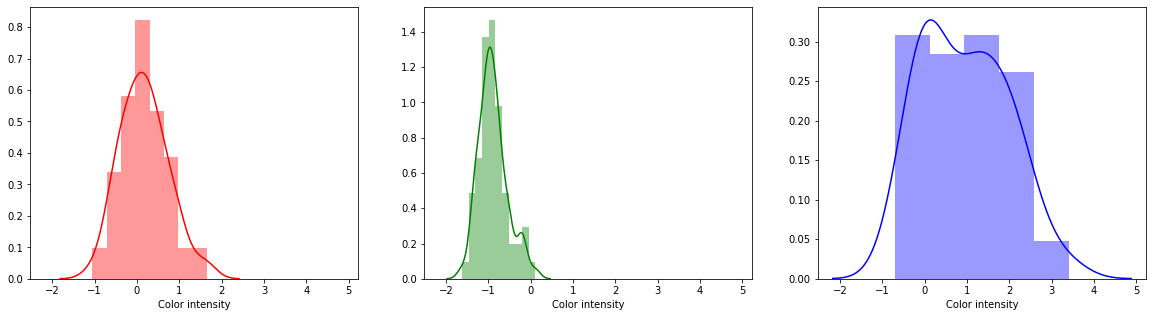

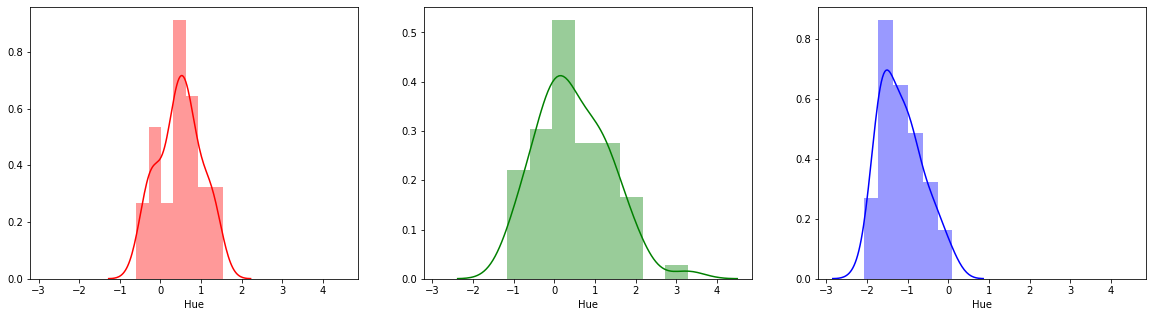

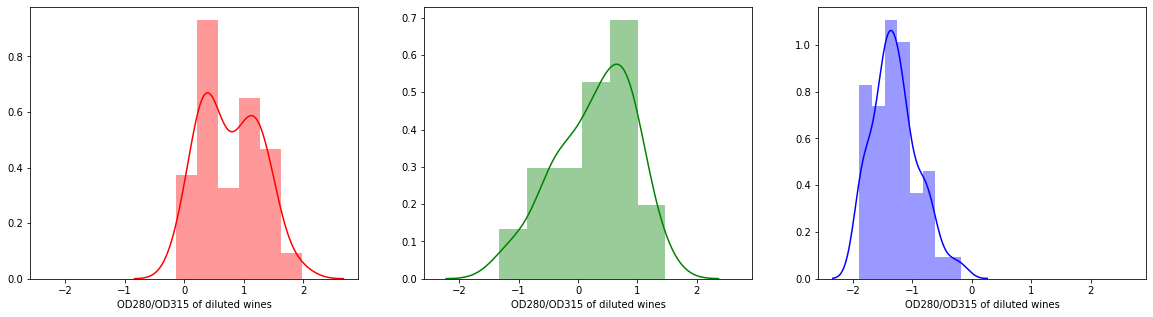

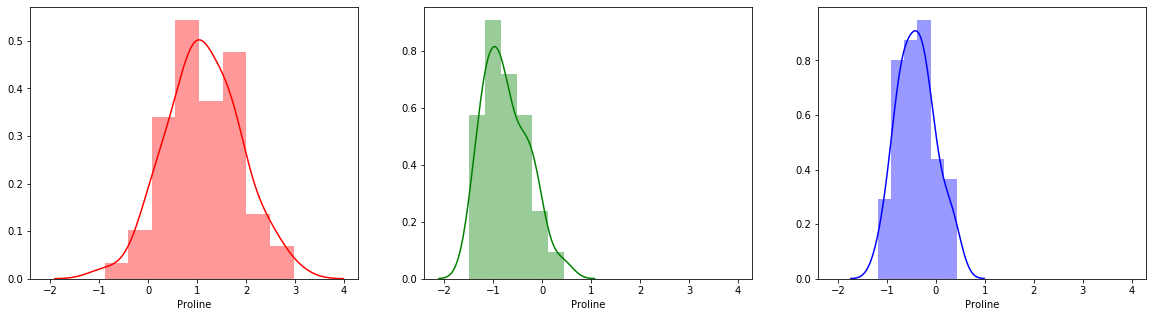

In [66]:
for df in lst:
    df.columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','target']

lst2 = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline','target']
for i in range(len(lst2)-1):
    f, axes = plt.subplots(1,3 , figsize=(20, 5),sharex = True)
    sns.distplot(lst[0][lst2[i]], color = 'r', label = lst2[i], ax = axes[0])
    sns.distplot(lst[1][lst2[i]], color = 'g', label = lst2[i], ax = axes[1])
    sns.distplot(lst[2][lst2[i]], color = 'b', label = lst2[i], ax = axes[2])

# Exercise 4: KMeans not efficient

As we wrote above, two possible cases in which KMeans fails is when the data in our dataset are not normalized or when there are too many features. Anyway, these are not the only characteristics that can cause an inefficency:

- Outlayers: if there are someoutlayers, it can happen that one (or more, if there are more outlayers) centroid starts from there. In this case, the final configuration is not correct. In this situation the centroid/centroids located on/near the outlayer capture only that point (there is a cluster made only of one point). it can also happen that the centroid near the outlayer captures also other points, but the final clusterization that we will have, it won't be correct.

- On the corners: if the centroid/centroids are at the corner and no one point is closed to them and only one centroid is close to the points, then teo possible cases occurs: not all centroids captures some points (similar to the case above) or the centroids capture the points, but without showing the correct clusters. These cases will be shown in the code (We can imagine that in the corners there are the oulayers).

- Cluster with different density, because with the KMeans is implicity assumed that each cluster must contain almost the same number of point. 

- No Spherical cluster: it is another implicit assumption of the KMeans, when clusters have a different shape, KMeans may not work properly.

In our Data Frame we have found the second kind of failure, so we are going to show you this one and we simulate also the case in which two centroids are at the corners. We won't analyze the case that the centroids are distributed as a triangle, because we have seen that it dosen't create a problem in this case (probabily because of the shape of the data). 

#### Pratical Info:

We are going to use the normalized DF opened before (db_normalize) and we scale it in two dimensions, so it is easier to plot it. In order to optimize our work we are going to use some functions from the library clustering_lib (created before). The only two new functions that we are going to call here (in theoretical_lib) are used to find cases in which there are somenthing wrong (test centroids), it repeats many times the clusterization procss with random centroids and save the coast function and its relative starting centroids. The function "distances_cumulative_sum" returns the sum of all distances between centroids and their point, it is useful to plot some results.

## Code:

In [1]:
# Import libraries and set the path:

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from collections import defaultdict
import seaborn as sns

#  Libraries we have created:

from clustering_lib import gen_random_centroids
from clustering_lib import Kmeans
from clustering_lib import Normalize
from clustering_lib import Scale
import theoretical_lib as tl
from clustering_lib import cost

In [ ]:
# Scale the DF:

In [39]:
db_scale = Scale(db_normalize) # Normalize data

In [ ]:
# Find a case that dosen't minimize the cost function:

We have seen that in the average the cost function value is between 190 and 192 (for this normalize DF), so this clearly a case that must be analyzed.

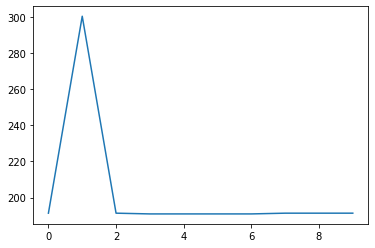

In [40]:
np.random.seed(112)
test = tl.test_centroids(10, 3, db_scale)
distances = [i[0] for i in test]
plt.plot(distances)
plt.show()

In [ ]:
# Print an average case vs a wrong:

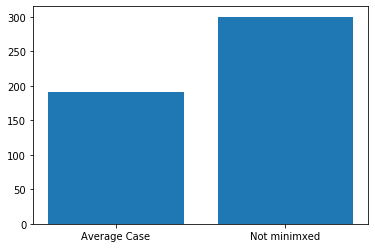

In [42]:
plt.bar(["Average Case", "Not minimxed"], [test[5][0], test[1][0]])
plt.show()

In [ ]:
# Let's save the starting centroids that lead to this case:

In [44]:
wrong_centr = test[1][1]

In [ ]:
# Let's see the starting point with this centroids:

As we can see one centroid is on one corner and far away from the points, instead the other two are close to the points.

In [45]:
centr_coord_x = [] # a list with the x of each centroid
centr_coord_y= [] # a list with the y of each centroid
for center in wrong_centr:
    x = center[0]
    y = center[1]
    centr_coord_x.append(x)
    centr_coord_y.append(y)

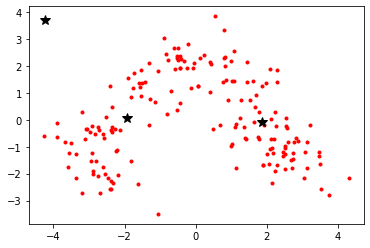

In [46]:
plt.plot(db_scale[0], db_scale[1], ".r")
plt.plot(centr_coord_x, centr_coord_y, "*k", markersize = 10)
plt.show()

In [ ]:
# Let's see what happens if we do the kmeans with this data:

In [48]:
centroids = gen_random_centroids(db_scale, 3)
k_res = Kmeans(3, db_scale, centroids)

# Generate the DF:


to_df = defaultdict(list)

for key in k_res[0].keys():
    points = k_res[0][key]
    for point in points:
        
        c0 = point[0]
        c1 = point[1]
        
        to_df["cluster"].append(key)   
        to_df["component_0"].append(c0)
        to_df["component_1"].append(c1)
        
km_correct_df = pd.DataFrame(to_df)

# Get the coordinates of the centroids:

centers = k_res[1] # a list with the final centroids

centr_coord_x = []
centr_coord_y= []
for centr in centers:

    x = centr[0]
    y = centr[1]
    centr_coord_x.append(x)
    centr_coord_y.append(y)

In [ ]:
# Implement the KMeans with wrong centroids:

In [49]:
k_res = Kmeans(3, db_scale, wrong_centr)

# Generate the DF:


to_df_1 = defaultdict(list)

for key in k_res[0].keys():
    points = k_res[0][key]
    for point in points:
        
        c0 = point[0]
        c1 = point[1]
        
        to_df_1["cluster"].append(key)   
        to_df_1["component_0"].append(c0)
        to_df_1["component_1"].append(c1)
        
km_correct_df_1 = pd.DataFrame(to_df_1)

# Get the coordinates of the centroids:

centers = k_res[1] # a list with the final centroids

centr_coord_x_1 = []
centr_coord_y_1= []
for centr in centers:

    x = centr[0]
    y = centr[1]
    centr_coord_x_1.append(x)
    centr_coord_y_1.append(y)

In [ ]:
# Plot our results:

As we have said in the premise above, the centroid far away from all the points has not captured any point. It is clear that this fenomena is not determianted by the fact that the centroid is in a corner, but that no points are close to it. So this situation can be thought as the one in which there is an outlayer. 

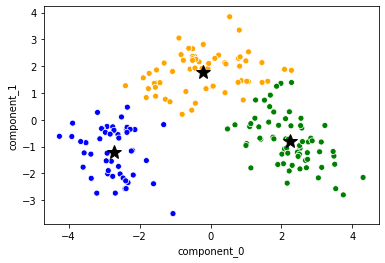

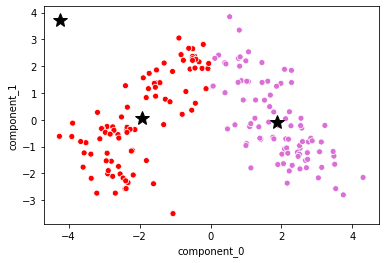

In [50]:
plt.figure(1)
sns.scatterplot(x = 'component_0', y = 'component_1', hue = 'cluster', data = km_correct_df, 
                legend = False, palette = ["blue", "orange", "green"])
plt.plot(centr_coord_x, centr_coord_y, "*k", markersize=15)

plt.figure(2)
sns.scatterplot(x = 'component_0', y = 'component_1', hue = 'cluster', data = km_correct_df_1, 
                legend = False, palette = ["red", "orchid"])
plt.plot(centr_coord_x_1, centr_coord_y_1, "*k", markersize=15)

plt.show()

In [52]:
coordinates = list(zip(centr_coord_x, centr_coord_y))

In [ ]:
# Let's see what happens with two centroids at the corner and one in the middle:

In [53]:
centroo = np.array(([-4.0, 4.0], [4.0,4.0], [0,0])) # Centroids as described above

In [54]:
k_res = Kmeans(3, db_scale, centroo)

# Generate the DF:


to_df_2 = defaultdict(list)

for key in k_res[0].keys():
    points = k_res[0][key]
    for point in points:
        
        c0 = point[0]
        c1 = point[1]
        
        to_df_2["cluster"].append(key)   
        to_df_2["component_0"].append(c0)
        to_df_2["component_1"].append(c1)
        
km_correct_df_2 = pd.DataFrame(to_df_2)

# Get the coordinates of the centroids:

centers = k_res[1] # a list with the final centroids

centr_coord_x_2 = []
centr_coord_y_2= []
for centr in centers:

    x = centr[0]
    y = centr[1]
    centr_coord_x_2.append(x)
    centr_coord_y_2.append(y)

In [ ]:
# Print an average case vs the wrong ones:

As we can imagine now the cost function is greater. This happens because also the second centroid on the corner dosen't have any point close to it (as before, think this situation as there is an outlayer in that position).

In [55]:
tot = 0 # Sum of all distances
for key in k_res[0].keys():
    points = k_res[0][key]
    cluster = k_res[1][key-1] # Select the right centroid
    
    for point in points: # For each point
        dist_point = np.sqrt(((point-cluster)**2).sum())
        tot += dist_point

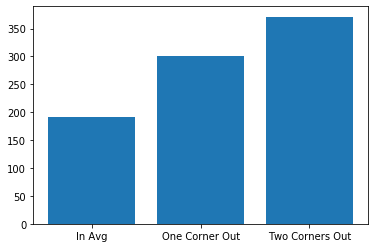

In [56]:
plt.bar(["In Avg","One Corner Out","Two Corners Out"], [test[5][0], test[1][0], tot])
plt.show()

In [ ]:
# Plot our results:

As you can see we have fund some clusters, but they are not the correct ones:

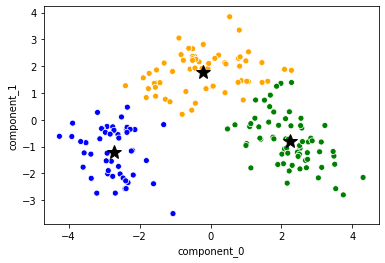

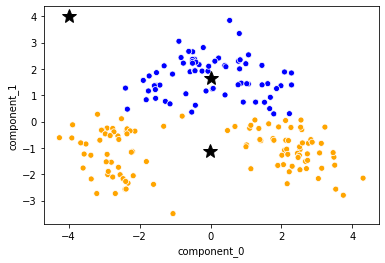

In [58]:
plt.figure(1)
sns.scatterplot(x = 'component_0', y = 'component_1', hue = 'cluster', data = km_correct_df, 
                legend = False, palette = ["blue", "orange", "green"])
plt.plot(centr_coord_x, centr_coord_y, "*k", markersize=15)


plt.figure(2)
sns.scatterplot(x = 'component_0', y = 'component_1', hue = 'cluster', data = km_correct_df_2, 
                legend = False, palette = ["blue", "orange"])
plt.plot(centr_coord_x_2, centr_coord_y_2, "*k", markersize=15)

plt.show()